# About

In this programming assignment you will train a classifier to identify type of a particle. There are six particle types: electron, proton, muon, kaon, pion and ghost. Ghost is a particle with other type than the first five or a detector noise. 

Different particle types remain different responses in the detector systems or subdetectors. Thre are five systems: tracking system, ring imaging Cherenkov detector (RICH), electromagnetic and hadron calorimeters, and muon system.

![pid](pic/pid.jpg)

You task is to identify a particle type using the responses in the detector systems. 

# Attention

Data files you should download from https://github.com/hse-aml/hadron-collider-machine-learning/releases/tag/Week_2

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import pandas as pd
import numpy
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import utils

# Download data

Download data used to train classifiers.

### Read training file

In [2]:
data = pandas.read_csv('training.csv.gz')

In [3]:
data.head()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton
0,74791.156263,15.0,0.232275,1.0,1.0,3.2,-2.505719,6.604153,1.0,1.929960,...,28.0,1.0,-7.213300,-0.280200,5586.589846,1.0,1.0,10.422315,-2.081143e-07,-24.824400
1,2738.489989,15.0,-0.357748,0.0,1.0,3.2,1.864351,0.263651,1.0,-2.061959,...,32.0,1.0,-0.324317,1.707283,-0.000007,0.0,1.0,43.334935,2.771583e+00,-0.648017
2,2161.409908,17.0,-999.000000,0.0,0.0,-999.0,-999.000000,-999.000000,0.0,-999.000000,...,27.0,0.0,-999.000000,-999.000000,-999.000000,0.0,0.0,-999.000000,-9.990000e+02,-999.000000
3,15277.730490,20.0,-0.638984,0.0,1.0,3.2,-2.533918,-8.724949,1.0,-3.253981,...,36.0,1.0,-35.202221,-14.742319,4482.803707,0.0,1.0,2.194175,-3.070819e+00,-29.291519
4,7563.700195,19.0,-0.638962,0.0,1.0,3.2,-2.087146,-7.060422,1.0,-0.995816,...,33.0,1.0,25.084287,-10.272412,5107.554680,0.0,1.0,0.000015,-5.373712e+00,23.653087


### List of columns in the samples

Here, **Spd** stands for Scintillating Pad Detector, **Prs** - Preshower, **Ecal** - electromagnetic calorimeter, **Hcal** - hadronic calorimeter, **Brem** denotes traces of the particles that were deflected by detector.

- ID - id value for tracks (presents only in the test file for the submitting purposes)
- Label - string valued observable denoting particle types. Can take values "Electron", "Muon", "Kaon", "Proton", "Pion" and "Ghost". This column is absent in the test file.
- FlagSpd - flag (0 or 1), if reconstructed track passes through Spd
- FlagPrs - flag (0 or 1), if reconstructed track passes through Prs
- FlagBrem - flag (0 or 1), if reconstructed track passes through Brem
- FlagEcal - flag (0 or 1), if reconstructed track passes through Ecal
- FlagHcal - flag (0 or 1), if reconstructed track passes through Hcal
- FlagRICH1 - flag (0 or 1), if reconstructed track passes through the first RICH detector
- FlagRICH2 - flag (0 or 1), if reconstructed track passes through the second RICH detector
- FlagMuon - flag (0 or 1), if reconstructed track passes through muon stations (Muon)
- SpdE - energy deposit associated to the track in the Spd
- PrsE - energy deposit associated to the track in the Prs
- EcalE - energy deposit associated to the track in the Hcal
- HcalE - energy deposit associated to the track in the Hcal
- PrsDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Prs
- BremDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Brem
- TrackP - particle momentum
- TrackPt - particle transverse momentum
- TrackNDoFSubdetector1  - number of degrees of freedom for track fit using hits in the tracking sub-detector1
- TrackQualitySubdetector1 - chi2 quality of the track fit using hits in the tracking sub-detector1
- TrackNDoFSubdetector2 - number of degrees of freedom for track fit using hits in the tracking sub-detector2
- TrackQualitySubdetector2 - chi2 quality of the track fit using hits in the  tracking sub-detector2
- TrackNDoF - number of degrees of freedom for track fit using hits in all tracking sub-detectors
- TrackQualityPerNDoF - chi2 quality of the track fit per degree of freedom
- TrackDistanceToZ - distance between track and z-axis (beam axis)
- Calo2dFitQuality - quality of the 2d fit of the clusters in the calorimeter 
- Calo3dFitQuality - quality of the 3d fit in the calorimeter with assumption that particle was electron
- EcalDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Ecal
- EcalDLLbeMuon - delta log-likelihood for a particle candidate to be muon using information from Ecal
- EcalShowerLongitudinalParameter - longitudinal parameter of Ecal shower
- HcalDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Hcal
- HcalDLLbeMuon - delta log-likelihood for a particle candidate to be using information from Hcal
- RICHpFlagElectron - flag (0 or 1) if momentum is greater than threshold for electrons to produce Cherenkov light
- RICHpFlagProton - flag (0 or 1) if momentum is greater than threshold for protons to produce Cherenkov light
- RICHpFlagPion - flag (0 or 1) if momentum is greater than threshold for pions to produce Cherenkov light
- RICHpFlagKaon - flag (0 or 1) if momentum is greater than threshold for kaons to produce Cherenkov light
- RICHpFlagMuon - flag (0 or 1) if momentum is greater than threshold for muons to produce Cherenkov light
- RICH_DLLbeBCK  - delta log-likelihood for a particle candidate to be background using information from RICH
- RICH_DLLbeKaon - delta log-likelihood for a particle candidate to be kaon using information from RICH
- RICH_DLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from RICH
- RICH_DLLbeMuon - delta log-likelihood for a particle candidate to be muon using information from RICH
- RICH_DLLbeProton - delta log-likelihood for a particle candidate to be proton using information from RICH
- MuonFlag - muon flag (is this track muon) which is determined from muon stations
- MuonLooseFlag muon flag (is this track muon) which is determined from muon stations using looser criteria
- MuonLLbeBCK - log-likelihood for a particle candidate to be not muon using information from muon stations
- MuonLLbeMuon - log-likelihood for a particle candidate to be muon using information from muon stations
- DLLelectron - delta log-likelihood for a particle candidate to be electron using information from all subdetectors
- DLLmuon - delta log-likelihood for a particle candidate to be muon using information from all subdetectors
- DLLkaon - delta log-likelihood for a particle candidate to be kaon using information from all subdetectors
- DLLproton - delta log-likelihood for a particle candidate to be proton using information from all subdetectors
- GhostProbability - probability for a particle candidate to be ghost track. This variable is an output of classification model used in the tracking algorithm.

Delta log-likelihood in the features descriptions means the difference between log-likelihood for the mass hypothesis that a given track is left by some particle (for example, electron) and log-likelihood for the mass hypothesis that a given track is left by a pion (so, DLLpion = 0 and thus we don't have these columns). This is done since most tracks (~80%) are left by pions and in practice we actually need to discriminate other particles from pions. In other words, the null hypothesis is that particle is a pion.

### Look at the labels set

The training data contains six classes. Each class corresponds to a particle type. Your task is to predict type of a particle.

In [4]:
set(data.Label)

{'Electron', 'Ghost', 'Kaon', 'Muon', 'Pion', 'Proton'}

Convert the particle types into class numbers.

In [5]:
data['Class'] = utils.get_class_ids(data.Label.values)
set(data.Class)

{0, 1, 2, 3, 4, 5}

### Define training features

The following set of features describe particle responses in the detector systems:

![features](pic/features.jpeg)

Also there are several combined features. The full list is following.

In [6]:
features = list(set(data.columns) - {'Label', 'Class'})

### Divide training data into 2 parts

In [7]:
def get_safe_balanced_split(target, trainSize=0.8, getTestIndexes=True, shuffle=False, seed=None):
    classes, counts = np.unique(target, return_counts=True)
    nPerClass = float(len(target))*float(trainSize)/float(len(classes))
    if nPerClass > np.min(counts):
        print("Insufficient data to produce a balanced training data split.")
        print("Classes found %s"%classes)
        print("Classes count %s"%counts)
        ts = float(trainSize*np.min(counts)*len(classes)) / float(len(target))
        print("trainSize is reset from %s to %s"%(trainSize, ts))
        trainSize = ts
        nPerClass = float(len(target))*float(trainSize)/float(len(classes))
    # get number of classes
    nPerClass = int(nPerClass)
    print("Data splitting on %i classes and returning %i per class"%(len(classes),nPerClass ))
    # get indexes
    trainIndexes = []
    for c in classes:
        if seed is not None:
            np.random.seed(seed)
        cIdxs = np.where(target==c)[0]
        cIdxs = np.random.choice(cIdxs, nPerClass, replace=False)
        trainIndexes.extend(cIdxs)
    # get test indexes
    testIndexes = None
    if getTestIndexes:
        testIndexes = list(set(range(len(target))) - set(trainIndexes))
    # shuffle
    if shuffle:
        trainIndexes = random.shuffle(trainIndexes)
        if testIndexes is not None:
            testIndexes = random.shuffle(testIndexes)
    # return indexes
    return trainIndexes, testIndexes

In [8]:
#training_data, validation_data = train_test_split(data.sample(500000), random_state=11, train_size=0.90)#
my_data = data#.sample(100000)
trainIndexes, testIndexes = stratSplit = get_safe_balanced_split(my_data.Class.values, trainSize=0.9, seed=11)
training_data = my_data.iloc[trainIndexes,:]
validation_data = my_data.iloc[testIndexes,:]

Data splitting on 6 classes and returning 180000 per class


In [9]:
len(training_data), len(validation_data)

(1080000, 120000)

In [10]:
training_data_clean = training_data.drop("Label",axis=1)
validation_data_clean = validation_data.drop("Label",axis=1)

## My preprocessing

In [11]:
def preprocessing(training_data_clean, 
                  dropGhost = False,
                  pumpFeatures = False, 
                  dropCorrelated = False, 
                  removeOutliers = False, 
                  binFeatures = False,
                  dropDuplicates = False, 
                  featuresImportance = False,
                  dropFlags=False
                 ):
    if dropFlags:
        training_data_clean = training_data_clean[training_data_clean.columns.drop(list(training_data_clean.filter(regex='Flag')))]
    
    # basic preprocessing
    if dropGhost:
        print(""+str(len(training_data)))
        training_data_clean = training_data_clean.drop("GhostProbability",axis=1)
        training_data_clean.columns
        print(len(training_data_clean))
    
    # transforming distributions
    if pumpFeatures:
        import numpy as np
        for c in training_data_clean.columns:
            #print(c)
            if c == "Class" or c == "Label":
                continue
            values = training_data_clean[c]
            training_data_clean.drop(c,axis=1,inplace=True)
            if len(np.unique(np.abs(values)))>3:
                values = (np.abs(values)**(1/3)) * np.sign(values) #values**(1/3)
            #training_data_clean[c] = values
            training_data_clean.loc[:,c] = values
    
    if dropCorrelated:
        # drop correlated columns
        import numpy as np
        print("Before drop correlated: " + str(len(training_data_clean.columns)))
        #print(training_data_clean.columns)
        # Create correlation matrix
        corr_matrix = training_data_clean.corr().abs()
        # Select upper triangle of correlation matrix
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        # Find features with correlation greater than 0.95
        to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
        # Drop features 
        training_data_clean = training_data_clean.drop(to_drop, axis=1, inplace=False)
        print("After drop correlated: " + str(len(training_data_clean.columns)))
        #print(training_data_clean.columns)
        
    # removing outliers based on z-score
    if removeOutliers:
        from scipy import stats
        import numpy as np
        print("Before removing outliers based on z-score: "+str(len(training_data_clean)))
        #print(training_data_clean.columns)
        #training_data_clean = training_data_clean.drop(["Label"],axis=1)
        training_data_clean = training_data_clean[(np.abs(stats.zscore(training_data_clean)) < 3).all(axis=1)]
        print("After removing outliers based on z-score: "+str(len(training_data_clean)))
        #print(training_data_clean.columns)
        
    #Binning
    if binFeatures:
        from sklearn.preprocessing import KBinsDiscretizer
        enc = KBinsDiscretizer(n_bins=20,encode="ordinal", strategy='kmeans')
        for c in training_data_clean.columns:
            if c == "Class" or c == "Label":
                continue
            values = training_data_clean[c].values
            if len(np.unique(values))>3:          
                #print(c)
                res = enc.fit_transform(values.reshape(-1, 1))
                training_data_clean.drop(c,axis=1,inplace=True)
                training_data_clean[c] = res
        training_data_clean
    
    # dropping duplicates
    if dropDuplicates:
        print("Before dropping duplicates: "+str(len(training_data_clean)))
        training_data_clean = training_data_clean.drop_duplicates()
        print("After dropping duplicates: "+str(len(training_data_clean)))
    
    best_features = [x for x in training_data_clean.columns if x not in ["Class", "Label"]]
    
    #Using Features Importance
    if featuresImportance:
        
        training_data_clean_small = training_data_clean.sample(10000)
        
        from sklearn.ensemble import ExtraTreesClassifier
        import pandas as pd
        import matplotlib.pyplot as plt
        
        predictors = [x for x in training_data_clean_small.columns if x not in ["Class", "Label"]]
        X=training_data_clean_small

        model = ExtraTreesClassifier()
        model.fit(X[predictors],X["Class"])

        print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
        #plot graph of feature importances for better visualization
        feat_importances = pd.Series(model.feature_importances_, index=X[predictors].columns)
        feat_importances.nlargest(20).plot(kind='barh')
        plt.show()
        best_features = list(feat_importances.nlargest(20).keys())
    
    return (training_data_clean, best_features)

# Sklearn classifier

On this step your task is to train **Sklearn** classifier to provide lower **log loss** value.


TASK: your task is to tune the classifier parameters to achieve the lowest **log loss** value on the validation sample you can.

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
if False:
    training_data_clean, my_features = preprocessing(training_data_clean, 
                  dropGhost = False,
                  pumpFeatures = True, 
                  dropCorrelated = True, 
                  removeOutliers = False, 
                  binFeatures = False,
                  dropDuplicates = False, 
                  featuresImportance = False, 
                  dropFlags = False
                )
    validation_data_clean, my_features = preprocessing(validation_data_clean, 
                  dropGhost = False,
                  pumpFeatures = True, 
                  dropCorrelated = False, 
                  removeOutliers = False, 
                  binFeatures = False,
                  dropDuplicates = False, 
                  featuresImportance = False, 
                  dropFlags = False
                )
    
    #Baseline
    from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
    from sklearn import metrics   #Additional scklearn functions
    from sklearn.model_selection import cross_val_score, cross_validate
    from sklearn.model_selection import GridSearchCV
    from sklearn.experimental import enable_halving_search_cv
    from sklearn.model_selection import HalvingGridSearchCV
    import pandas as pd
    import numpy as np
    import random
    from tune_sklearn import TuneGridSearchCV, TuneSearchCV

    training_data_small = training_data_clean
    target = 'Class'

    def modelfit(alg, dtrain, predictors):
        alg.fit(dtrain[predictors], dtrain.Class.values)
        dtrain_predictions = alg.predict(dtrain[predictors])
        dtrain_predprob = alg.predict_proba(dtrain[predictors])
        cv_score = cross_val_score(alg, dtrain[predictors], dtrain.Class.values, cv=2, scoring='neg_log_loss')
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        #feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        #feat_imp.plot(kind='bar', title='Feature Importances')
        #plt.ylabel('Feature Importance Score')

    predictors = [x for x in training_data_small.columns if x not in [target, "Label"]]
    gbm0 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, subsample=0.3, random_state=13, min_samples_leaf=100, max_depth=3)
    modelfit(gbm0, training_data_small, predictors)
    print("")

    ########## Tuning

    #Choose all predictors except target & IDcols
    predictors = [x for x in training_data_small.columns if x not in [target, "Label"]]

    # Used in the code provided
    # learning_rate=0.1, n_estimators=50, subsample=0.3, min_samples_leaf=100, max_depth=3, random_state=13

    param_dists = {
        'learning_rate':(0.001,1), #np.arange(0.1,0.4,0.1),
        #'n_estimators':(40,60), #np.arange(40,60,5),
        'subsample':(0.001,1), #np.arange(0.1,0.8,0.1),
        'min_samples_leaf':(50,150), #np.arange(80,120,10),
        'max_depth':(1,10), #np.arange(1,5)
    }
    gsearch1 = TuneSearchCV(
        estimator = GradientBoostingClassifier(random_state=13), 
        #param_grid = param_dists,
        scoring='neg_log_loss',
        n_jobs=-1,
        cv=2,
        verbose=1,
        param_distributions=param_dists,
        #n_iter=2,
        early_stopping=True,
        max_iters=10,
        search_optimization="bayesian"
    )
    gsearch1.fit(training_data_small[predictors],training_data_small[target])
    print(gsearch1.best_params_, gsearch1.best_score_)


In [14]:
%%time 
if False:
    target = "Class"
    predictors = [x for x in training_data_clean.columns if x not in [target, "Label"]]
    #gb = GradientBoostingClassifier(learning_rate=0.11, n_estimators=40, subsample=0.7100000000000001, random_state=13,
    #                                min_samples_leaf=50, max_depth=4)
    gb = GradientBoostingClassifier(learning_rate=0.35998275012421316, 
                                    n_estimators=10, 
                                    subsample=0.8189400569760711,
                                    min_samples_leaf=122, 
                                    max_depth=7, 
                                    random_state=13)
    gb.fit(training_data_clean[predictors].values, training_data_clean.Class.values)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.39 µs


### Log loss on the cross validation sample

In [15]:
# predict each track
#proba_gb = gb.predict_proba(validation_data_clean[predictors].values)

In [16]:
# 0.7080091383478055
# 0.8052100277759575
# best all dataset = 0.6489296102168618
#log_loss(validation_data_clean[training_data_clean.columns].Class.values, proba_gb)

In [17]:
#print(training_data.head())
# Plot to see features distribution
#for i in training_data.columns:
#    plt.figure()
#    values = training_data[i]
    #if len(np.unique(values))>200000:
    #    plt.hist(values**(1/3))
    #else:
#    plt.hist(values)
#    plt.title(i)

# Keras neural network

On this step your task is to train **Keras** NN classifier to provide lower **log loss** value.


TASK: your task is to tune the classifier parameters to achieve the lowest **log loss** value on the validation sample you can. Data preprocessing may help you to improve your score.

In [18]:
from keras.layers.core import Dense, Activation
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from tensorflow.keras import initializers

In [19]:
def nn_model(input_dim):
    model = Sequential()
    model.add(Dense(200, input_dim=input_dim, kernel_initializer=initializers.RandomNormal(stddev=0.01)))
    model.add(Activation('tanh'))
    
    model.add(Dense(100, kernel_initializer=initializers.RandomNormal(stddev=0.01)))
    model.add(Activation('sigmoid'))
    
    model.add(Dense(6, kernel_initializer=initializers.RandomNormal(stddev=0.01)))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=Adam())
    return model

In [20]:
training_data_clean = training_data.drop("Label",axis=1)
validation_data_clean = validation_data.drop("Label",axis=1)
print(training_data_clean.head())
training_data_clean, my_features = preprocessing(training_data_clean, 
                  dropGhost = False,
                  pumpFeatures = True, 
                  dropCorrelated = True, 
                  removeOutliers = False, 
                  binFeatures = False,
                  dropDuplicates = False, 
                  featuresImportance = False, 
                  dropFlags = False)
print(training_data_clean.head())
validation_data_clean,_  = preprocessing(validation_data_clean, 
              dropGhost = False,
              pumpFeatures = True, 
              dropCorrelated = False, 
              removeOutliers = False, 
              binFeatures = False,
              dropDuplicates = False, 
              featuresImportance = False, 
              dropFlags = False
            )

              TrackP  TrackNDoFSubdetector2  BremDLLbeElectron  MuonLooseFlag  \
760186   2484.020032                   18.0          -0.553584            0.0   
386883   5864.859878                   20.0           1.682815            0.0   
838767   4302.720211                   16.0          -0.553599            0.0   
509910   2645.129866                   13.0          -0.016688            0.0   
366821  19921.519524                   10.0           1.425992            0.0   

        FlagSpd   SpdE  EcalDLLbeElectron   DLLmuon  RICHpFlagElectron  \
760186      0.0 -999.0        -999.000000 -5.951335                1.0   
386883      1.0    3.2           2.644492 -0.529442                1.0   
838767      1.0    3.2           1.864335 -4.731082                1.0   
509910      1.0    0.0           1.864341 -5.445133                1.0   
366821      0.0 -999.0        -999.000000 -0.350808                1.0   

        EcalDLLbeMuon  ...  RICHpFlagMuon  RICH_DLLbeKaon  RICH_DLLb

In [21]:
# Baseline = 1.0381
# dropGhost = 
# pumpFeatures = 0.7795 
# dropCorrelated = 1.2312
# pumpFeatures + dropCorrelated = 0.8046
# removeOutliers = 
# binFeatures = 
# dropDuplicates = 
# featuresImportance = 

nn = nn_model(len(my_features))
nn.fit(
    training_data_clean[my_features].values,
    np_utils.to_categorical(training_data_clean.Class.values), 
    verbose=1, 
    epochs=100,
    use_multiprocessing=True,
    batch_size=256)

Epoch 1/100
4219/4219 [==============================] - 10s 2ms/step - loss: 0.7377
Epoch 2/100
4219/4219 [==============================] - 9s 2ms/step - loss: 0.6540
Epoch 3/100
4219/4219 [==============================] - 9s 2ms/step - loss: 0.6396
Epoch 4/100
4219/4219 [==============================] - 9s 2ms/step - loss: 0.6303
Epoch 5/100
4219/4219 [==============================] - 9s 2ms/step - loss: 0.6237
Epoch 6/100
4219/4219 [==============================] - 8s 2ms/step - loss: 0.6184
Epoch 7/100
4219/4219 [==============================] - 10s 2ms/step - loss: 0.6144
Epoch 8/100
4219/4219 [==============================] - 11s 3ms/step - loss: 0.6116
Epoch 9/100
4219/4219 [==============================] - 11s 3ms/step - loss: 0.6090
Epoch 10/100
4219/4219 [==============================] - 10s 2ms/step - loss: 0.6060
Epoch 11/100
4219/4219 [==============================] - 10s 2ms/step - loss: 0.6037
Epoch 12/100
4219/4219 [==============================] - 11s 3ms/st

### Log loss on the cross validation sample

In [22]:
# predict each track
import numpy as np # Had to for last version of Keras
predict_prob=nn.predict([validation_data_clean[my_features].values])
proba_nn = predict_prob # np.argmax(predict_prob) #nn.predict_proba(validation_data[features].values)

In [23]:
log_loss(validation_data_clean.Class.values, proba_nn)

0.593906423893887

# Quality metrics

Plot ROC curves and signal efficiency dependece from particle mometum and transverse momentum values.

In [24]:
proba = proba_nn

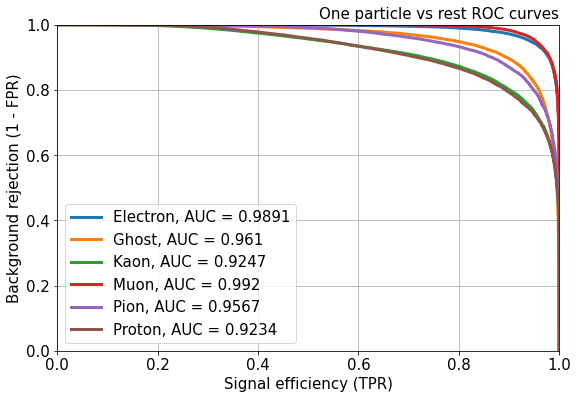

In [25]:
utils.plot_roc_curves(proba, validation_data_clean.Class.values)

/home/alberto/Scrivania/Addressing Large Hadron Collider Challenges by Machine Learning/hadron-collider-machine-learning/week2/utils.py:132: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(xx, yy, yerr=yy_err, xerr=xx_err, fmt=fmt, color=color, marker=marker, ms=ms, label=label, markeredgecolor=markeredgecolor, markeredgewidth=markeredgewidth, ecolor=ecolor)


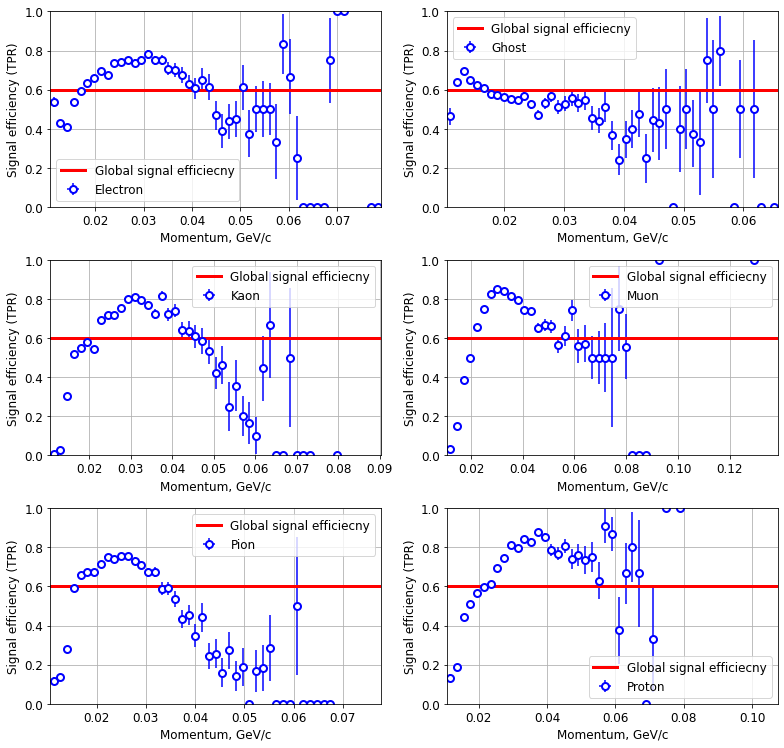

In [26]:
utils.plot_signal_efficiency_on_p(proba, validation_data_clean.Class.values, validation_data_clean.TrackP.values, 60, 50)
plt.show()

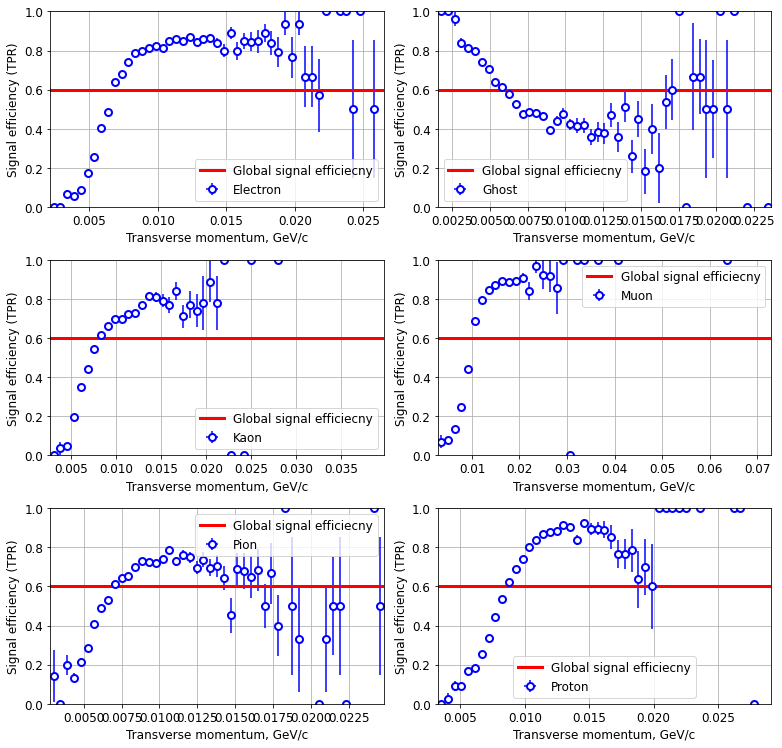

In [27]:
utils.plot_signal_efficiency_on_pt(proba, validation_data_clean.Class.values, validation_data_clean.TrackPt.values, 60, 50)
plt.show()

# Prepare submission

Select your best classifier and prepare submission file.

In [28]:
test = pandas.read_csv('test.csv.gz')

In [29]:
test, _ = preprocessing(test, 
                  dropGhost = False,
                  pumpFeatures = True, 
                  dropCorrelated = False, 
                  removeOutliers = False, 
                  binFeatures = False,
                  dropDuplicates = False, 
                  featuresImportance = False, 
                  dropFlags = False)

In [30]:
my_features = list(training_data_clean.columns)
my_features.remove("Class")
test[my_features].columns

Index(['TrackP', 'TrackNDoFSubdetector2', 'BremDLLbeElectron', 'MuonLooseFlag',
       'FlagSpd', 'SpdE', 'EcalDLLbeElectron', 'DLLmuon', 'RICHpFlagElectron',
       'EcalDLLbeMuon', 'TrackQualitySubdetector2', 'FlagPrs', 'DLLelectron',
       'DLLkaon', 'EcalE', 'TrackQualityPerNDoF', 'DLLproton',
       'PrsDLLbeElectron', 'FlagRICH1', 'MuonLLbeBCK', 'FlagHcal',
       'EcalShowerLongitudinalParameter', 'TrackPt', 'TrackDistanceToZ',
       'RICHpFlagPion', 'HcalDLLbeElectron', 'Calo3dFitQuality', 'FlagEcal',
       'TrackNDoFSubdetector1', 'RICHpFlagProton', 'RICHpFlagKaon',
       'GhostProbability', 'TrackQualitySubdetector1', 'RICH_DLLbeBCK',
       'FlagRICH2', 'FlagBrem', 'HcalDLLbeMuon', 'TrackNDoF', 'RICHpFlagMuon',
       'RICH_DLLbeElectron', 'HcalE', 'MuonFlag', 'FlagMuon',
       'RICH_DLLbeMuon'],
      dtype='object')

In [31]:
best_model = nn

In [32]:
# predict test sample
submit_proba = best_model.predict(test[my_features])
submit_ids = test.ID

In [33]:
from IPython.display import FileLink
utils.create_solution(submit_ids, submit_proba, filename='submission_file.csv.gz')

/home/alberto/Scrivania/Addressing Large Hadron Collider Challenges by Machine Learning/hadron-collider-machine-learning/week2/submission_file.csv.gz